In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
sharks = pd.read_csv('./Data_clean.csv', sep = ',', engine='python') #Usar engine='python', porque si no da error de lectura.

In [3]:
movie_sharks = pd.read_csv('./Shark movies.csv', sep = ',', engine='python')

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] 
fig_size

[12, 6]

In [5]:
movie_sharks2 = pd.read_csv('./ALL shark movies.csv', sep = ',', engine='python')

In [6]:
sharks.head(1)

,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula,Case Number,Date
0,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,Unknown,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,18-Sep-16


In [7]:
movie_sharks.head(1)

,Year,Movies
0,1949,0.0


# Hipótesis inicial: 
>-De los ataques registrados: **¿Con el paso de los años se ha ido aumentando la tasa de fatalidad (muertes/ataques)?**. **¿En cifras absolutas: cómo han evolucionado los ataques y las muertes?**<br>
>-De los resultados obtenidos sobre la evolución de muertes, intentar encontrar una posible relación 
        con la evolución de las películas sobre tiburones.
        
# Siguientes pasos de la hipótesis:
        - Si es posible, intentar ver que (co)relación hay entre la actividad que realizaba mientras recibió 
        el ataque y el aumento de ataques recibidos 
        - La evolución del peso de la actividad que realizaba

### Para empezar con el análisis, empezaremos analizando los ataques y las muertes debidas a ataques de tiburón en cifras absolutas, para luego pasar a analizar la tasa de fatalidad (muertes/ataques), hipótesis a la que quiero dar una respuesta.

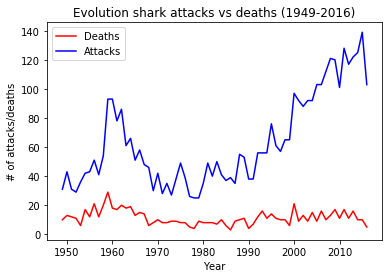

In [8]:
%matplotlib inline
plt.plot(sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"], label = 'Deaths', c='red')
plt.plot(sharks[(sharks["Fatal (Y/N)"]=="Y")|(sharks["Fatal (Y/N)"]=="N")|(sharks["Fatal (Y/N)"]=="UNKNOWN")].groupby(["Year"]).count()["Fatal (Y/N)"], label = 'Attacks', c='blue')
#print(sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"].plot())
plt.legend(loc=2)
plt.title('Evolution shark attacks vs deaths (1949-2016)')
plt.xlabel('Year')
plt.ylabel('# of attacks/deaths')
plt.show()

En el gráfico anterior, podemos ver cómo el **número de ataques de tiburón han aumentado a partir de la década de 1980** y las muertes producidas por ataques de tiburón se mantienen en valores más o menos estables.

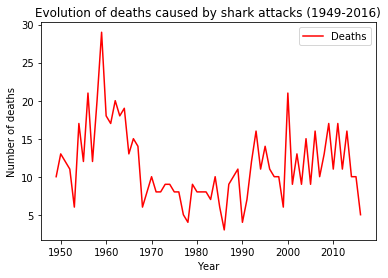

In [9]:
plt.plot(sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"], label = 'Deaths', c='red')
plt.legend(loc=1)
plt.title('Evolution of deaths caused by shark attacks (1949-2016)')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.show()

Ya que en el primer gráfico no pudimos ver correctamente la evolución de las muertes debidas a ataques de tiburón, puesto que se veían más o menos constantes, se ha creado un **nuevo gráfico** en el que podemos ver únicamente la **evolución anual del número de muertes por ataque de tiburón**. <br>Vemos que tuvo una **tendencia negativa hasta la mitad de la década de 1980**, cuándo cambia esta tendencia y vuelve a aumentar el número de muertes producidas por ataques de tiburón.

A continuación crearemos un nuevo DataFrame para calcular la tasa de fatalidad (muertes/ataques)

In [10]:
n_df=pd.DataFrame()
n_df['Dead']=sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['Not Dead']=sharks[sharks["Fatal (Y/N)"]=="N"].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['No info']=sharks[(sharks["Fatal (Y/N)"]=="UNKNOWN")].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['No info'].fillna(0,inplace=True)
n_df['% Dead']=(n_df['Dead']/(n_df['Dead']+n_df['Not Dead']+n_df['No info'])*100)
display(n_df.head())
display(n_df.describe())

,Dead,Not Dead,No info,% Dead
Year,,,,
1949,10,19,2.0,32.258065
1950,13,30,0.0,30.232558
1951,12,19,0.0,38.709677
1952,11,18,0.0,37.931034
1953,6,30,0.0,16.666667


,Dead,Not Dead,No info,% Dead
count,67.000000,67.000000,67.000000,67.000000
mean,11.552239,51.373134,0.835821,20.595704
std,4.896763,29.852078,1.009005,9.013089
min,3.000000,16.000000,0.000000,4.854369
25%,8.000000,30.000000,0.000000,14.083333
50%,10.000000,40.000000,1.000000,19.354839
75%,14.500000,75.000000,1.000000,26.884523
max,29.000000,129.000000,4.000000,41.176471



De los datos que se observan en la tabla anterior, obtenemos la siguiente información de la serie analizada:<br>
>  -  Hay una media de **63,8** ataques al año, lo que equivale a un ataque cada 5,7 días cada año.
>  -  La tasa media de fatalidad es de un **20,596%**, es decir, mueren dos personas por cada 10 ataques de tiburón.
        
         

A continuación representaremos en un gráfico la evolución de la tasa de fatalidad.

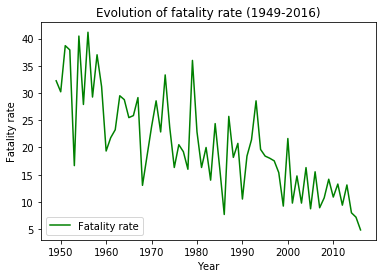

[12, 6]

In [11]:
%matplotlib inline
plt.plot(n_df["% Dead"], label='Fatality rate', c="green")
plt.legend(loc=3)
plt.title('Evolution of fatality rate (1949-2016)')
plt.xlabel('Year')
plt.ylabel('Fatality rate')
plt.show()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"]

Podemos ver que con el paso de los años **la tasa de fatalidad de los ataques de tiburón** ha disminuido 
desde un **40% en los años 1950** hasta encontrarese la tasa entorno a un **10% durante la primera década de los 2000.**

Los motivos de este descenso pueden ser variados:
>- Una **mejor respuesta sanitaria** ante los ataques de tiburón ( mejoras en la medicina)
>- Un **transporte más rápido** de los atacados a un centro sanitario (mejora de los transportes)

In [12]:
x=sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]
y=movie_sharks.groupby('Year').sum()['Movies']

In [13]:
x.loc[1969] = 0

In [14]:
x.sort_index(axis=0, inplace=True)

Añado el valor de 1969, puesto que no hubo muertes ese año, por lo que no aparecía este año y reordeno el dataframe para que el registro esté en el índice que le corresponde.

En el siguiente gráfico podemos ver la evolución de los estrenos de películas relacionadas con tiburones a lo largo de la serie estudiada

In [15]:
xaxis = [i for i in range(1949,2017)]


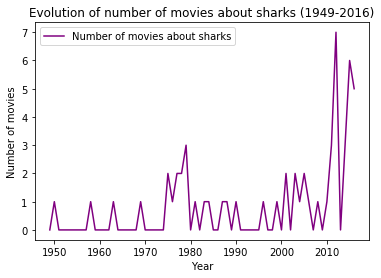

In [63]:
%matplotlib inline
plt.plot(xaxis, movie_sharks["Movies"], label='Number of movies about sharks', c='purple')
plt.legend(loc=2)
plt.title('Evolution of number of movies about sharks (1949-2016)')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

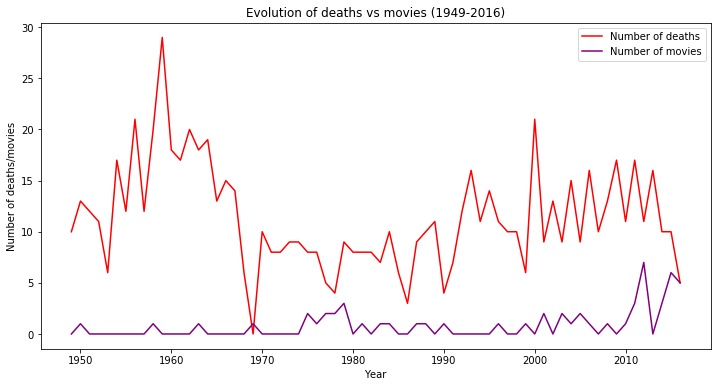

In [17]:
plt.plot(x, label = 'Number of deaths', c = 'red')
plt.plot(movie_sharks.groupby('Year').sum()['Movies'], label = 'Number of movies', c='purple')
plt.legend(loc=1)
plt.title('Evolution of deaths vs movies (1949-2016)')
plt.xlabel('Year')
plt.ylabel('Number of deaths/movies')
plt.show()

En el gráfico anterior podemos ver cómo en el momento en el que se invierte la tendencia de las muertes debidas a ataques de tiburón es justo cuándo se estrenan varias películas con la temática de tiburones.

In [18]:
display(movie_sharks2[(movie_sharks2['Title Type']=='movie')].sort_values('IMDb Rating', ascending = False).head(3))

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
92,93,tt0266543,2018-06-29,2018-06-29,Own,Finding Nemo,https://www.imdb.com/title/tt0266543/,movie,8.1,100.0,2003.0,"Animation, Adventure, Comedy, Family",869221.0,2003-05-30,"Andrew Stanton, Lee Unkrich"
46,47,tt0073195,2018-06-29,2018-06-29,Own,Jaws,https://www.imdb.com/title/tt0073195/,movie,8.0,124.0,1975.0,"Adventure, Drama, Thriller",511395.0,1975-06-20,Steven Spielberg
86,87,tt0056584,2018-06-29,2018-06-29,NaN,Tiburoneros,https://www.imdb.com/title/tt0056584/,movie,7.7,100.0,1963.0,Drama,138.0,1963-03-17,Luis Alcoriza


Podemos ver qué en estos años se estrenó la segunda mejor película (según la puntuación de IMBd) con temática de tiburones, de hecho, la película mejor valorada si nos ceñimos a una temática estrictamente de tiburones (puesto que la mejor valorada es Buscando a Nemo). <br>
Esta película es ***Jaws*** (**Tiburón**), de **Steven Spielberg**, estrenada en 1975.

A continuación vamos a intentar buscar una posible relación entre películas y muertes por ataques de tiburón.

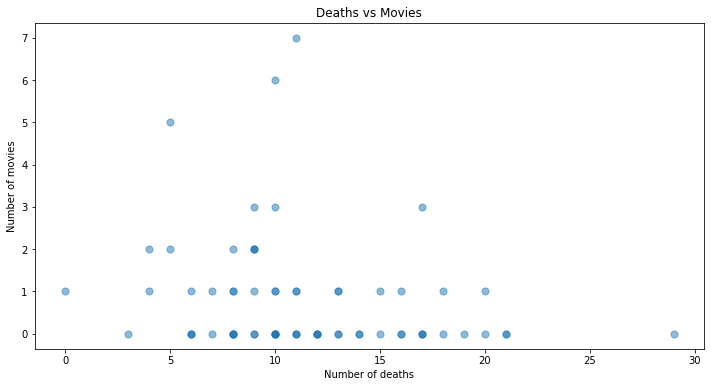

In [99]:
plt.scatter(x, y, s=50, alpha=0.5)
plt.title('Deaths vs Movies')
plt.xlabel('Number of deaths')
plt.ylabel('Number of movies')
plt.show()

##### No se ve relación alguna entre el número de películas y el número de muertes.

In [20]:
sharks['Country'].value_counts().head()

USA                 1782
AUSTRALIA            759
SOUTH AFRICA         455
PAPUA NEW GUINEA     114
BRAZIL                95
Name: Country, dtype: int64

In [21]:
sharks['Species'].value_counts().head()

Unknown        1719
Other           809
White Shark     536
Tiger Shark     204
Bull Shark      191
Name: Species, dtype: int64

Vamos a crear un nuevo data frame que contenga únicamente las especies catalogadas como tiburón

In [22]:
sharks_species = sharks[(sharks['Species']!='Unknown')&(sharks['Species']!='Shark involvement not confirmed')]

In [23]:
sharks_species

,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula,Case Number,Date
4,2016,9,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,UNKNOWN,No injury: Knocked off board by shark,N,UNKNOWN,Other,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,16-Sep-16
6,2016,9,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,M,60s,Minor injury to arm,N,15h15,Other,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,11-Sep-16
7,2016,9,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,F,51,Severe lacerations to shoulder & forearm,N,14h30,Tiger Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,07-Sep-16
12,2016,9,Unprovoked,USA,California,"Refugio State Beach, Santa Barbara County",Spearfishing,M,22,Two toes broken & lacerated,N,UNKNOWN,White Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.01,01-Sep-16
13,2016,8,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,25,Lacerations to right foot,N,15h00,Bull Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.29.b,29-Aug-16
15,2016,8,Unprovoked,REUNION,UNKNOWN,Boucan Canot,Surfing,M,20,"Right arm severed, ankle severely bitten",N,17h00,Bull Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.27,27-Aug-16
18,2016,8,Unprovoked,USA,Hawaii,Maui,SUP Foil boarding,M,21,"No inury, shark & board collided",N,UNKNOWN,Tiger Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.06,06-Aug-16
19,2016,8,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,22,Big toe bitten,N,UNKNOWN,Blacktip Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.04,04-Aug-16
20,2016,7,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,M,40,Lacerations to right hand,N,11h30,Blue Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.29,29-Jul-16
22,2016,7,Boat,AUSTRALIA,Western Australia,Near Albany,Kayaking,M,UNKNOWN,"No injury, shark nudged kayak repeatedly",N,UNKNOWN,White Shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.28,28-Jul-16


In [24]:
ndf=pd.DataFrame()
ndf['Attacks']=sharks_species[(sharks_species["Fatal (Y/N)"]=="Y")|(sharks_species["Fatal (Y/N)"]=="N")|(sharks_species["Fatal (Y/N)"]=="UNKNOWN")].groupby(['Species']).count()["Fatal (Y/N)"]
ndf['Dead']=sharks_species[sharks_species["Fatal (Y/N)"]=="Y"].groupby(['Species']).count()["Fatal (Y/N)"]
ndf['Not Dead']=sharks_species[sharks_species["Fatal (Y/N)"]=="N"].groupby(['Species']).count()["Fatal (Y/N)"]
ndf['No info']=sharks_species[sharks_species["Fatal (Y/N)"]=="UNKNOWN"].groupby(['Species']).count()["Fatal (Y/N)"]

In [25]:
ndf.fillna(0,inplace=True)

In [26]:
ndf['% Dead']=ndf['Dead']*100/(ndf['Dead']+ndf['Not Dead']+ndf['No info'])

In [27]:
ndf.sort_values('% Dead', ascending=False, inplace=True)

In [35]:
ndf = ndf.reset_index().rename_axis(None).rename_axis(None, axis=1)

In [45]:
ndf50=ndf[ndf['Attacks']>50]
display(ndf50)

,Species,Attacks,Dead,Not Dead,No info,% Dead
2,Tiger Shark,204,60.0,141,3.0,29.411765
4,Bull Shark,191,41.0,150,0.0,21.465969
5,White Shark,536,108.0,420,8.0,20.149254
8,Other,809,70.0,735,4.0,8.652658
9,Bronze Whaler Shark,72,5.0,66,1.0,6.944444
10,Sand Tiger Shark,162,8.0,154,0.0,4.938272
19,Blacktip Shark,89,0.0,89,0.0,0.000000


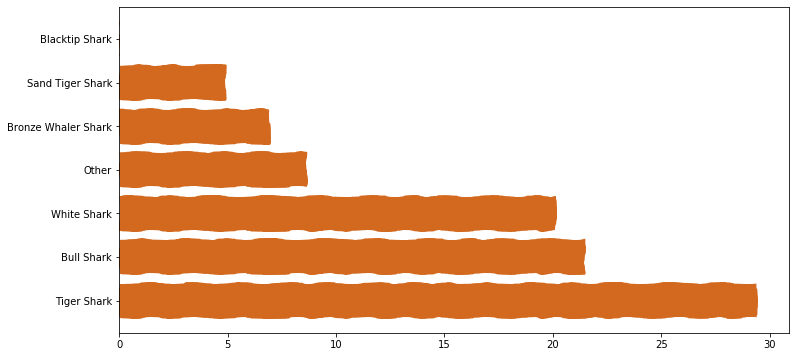

In [101]:
plt.barh(ndf50['Species'],ndf50['% Dead'], color='chocolate', sketch_params=True)
plt.show()

Al analizar la tasa de fatalidad (% muertes vs ataques) por especies de tiburón, podemos comprobar que el tiburón que provoca un mayor número de muertes frente a los ataques que realiza es el **tiburón tigre**, provocando la muerte en casi el ***30% de sus ataques***.<br>
La especie que más ataques ha realizado es el **tiburón blanco**, causando la muerte en más de un ***20% de sus ataques***.